<a href="https://colab.research.google.com/github/SilviaNurMahmudah/Machine-Learning/blob/main/Week14/Silvia_Nur_Mahmudah_2241727031_Js12_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA : SILVIA NUR MAHMUDAH

NIM : 2241727031

KELAS : TI-4J

### Pengantar K-Means

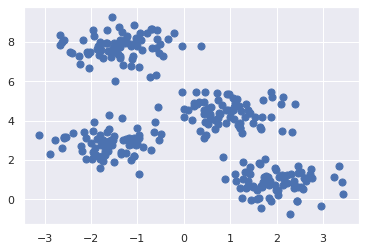

In [43]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [44]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

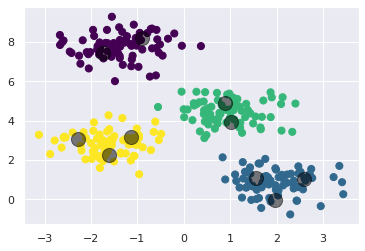

In [49]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

### Studi Kasus

In [45]:
import matplotlib.pyplot as plt
from skimage import io
import seaborn as sns; sns.set()
import numpy as np


In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


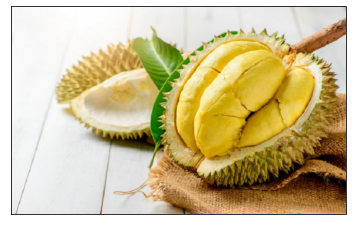

In [29]:
img = io.imread("/content/drive/MyDrive/ML/Week14-KMeans/durian.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(img);

In [30]:
img.shape

(450, 725, 3)

In [31]:
data = img / 255.0
data = data.reshape(450 * 725, 3)
data.shape

(326250, 3)

In [34]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

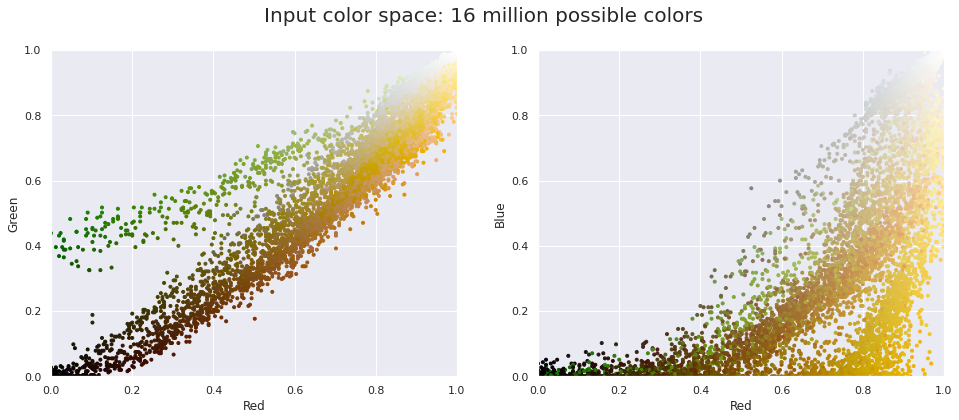

In [35]:
plot_pixels(data, title='Input color space: 16 million possible colors')

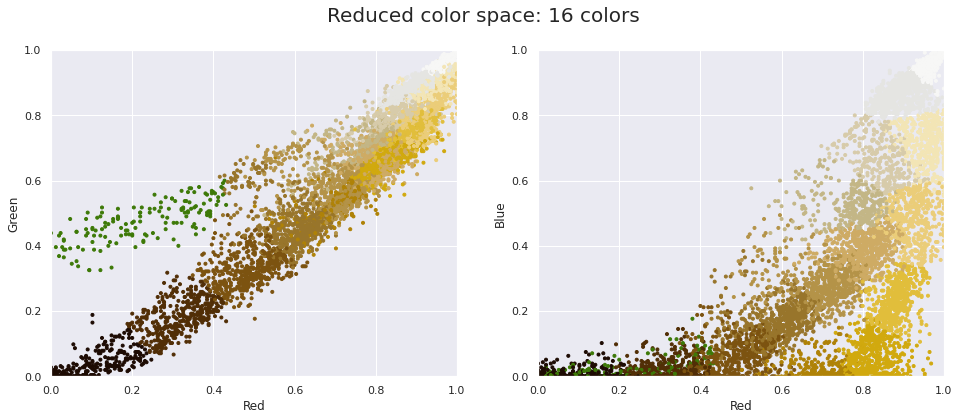

In [36]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

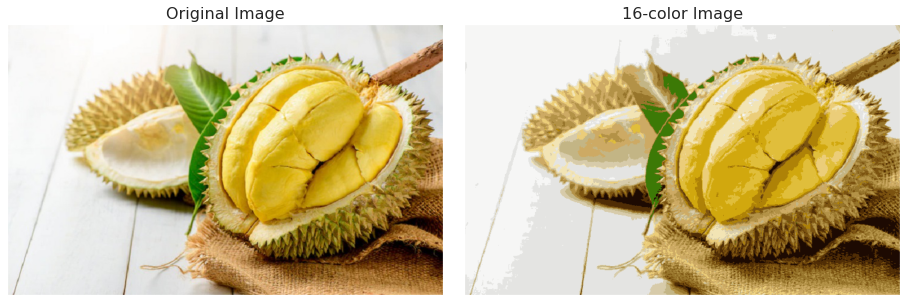

In [39]:
img_recolored = new_colors.reshape(img.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('16-color Image', size=16);

### Elbow Method - Within-Cluster-Sum of Squared Errors (WSS)

In [41]:
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
   
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

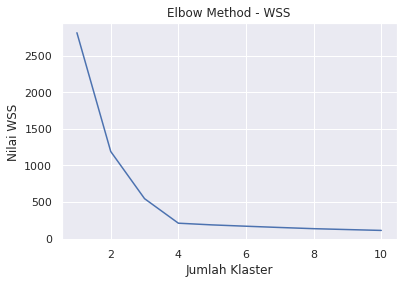

In [46]:
ycall = [1,2,3,4,5,6,7,8,9,10]

yWSS = calculate_WSS(X, 10)

plt.plot(ycall, yWSS)
plt.title('Elbow Method - WSS')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Nilai WSS')
plt.show()

### The Silhouette Method

In [47]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

sil

[0.5426422297358302,
 0.5890390393551768,
 0.6819938690643478,
 0.5923027677672242,
 0.4933746508505838,
 0.40933203054680595,
 0.3231653252823174,
 0.336272427600431,
 0.35401422381635267]

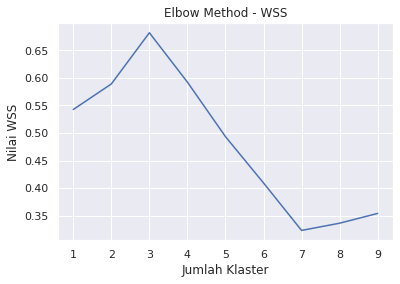

In [48]:
xsil = [1,2,3,4,5,6,7,8,9]

plt.plot(xsil, sil)
plt.title('Elbow Method - WSS')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Nilai WSS')
plt.show()